In [4]:
import torch
import numpy as np

# Broadcasting

Algoritmo per capire se è possibile il broadcasting tra due vettori:
1. Si aggiungono tante dimensioni uguali a 1 all'array con meno dimensioni, in manier tale che il numero di dimensioni dei dure array sia uguale
2. Si può effettuare il broadcast se, per ogni coppia di dimensioni, le dimensioni sono uguali oppure una di esse vale 1

In [49]:
images = torch.rand(10, 640, 480, 3)

# divido per 10 il canale green
t = torch.tensor([1, 10, 1], dtype=torch.float)
images2 = images/t
print(f"shape = {images2.shape}")
n = 0
r = 4
c = 65
print(images[n,r,c,:])
print(images2[n,r,c,:])

#divido per 10 l'ultima riga di ogni immagine
t = torch.ones(640, 1, 1)
t[-1] = 10
images3 = images/t
print(f"shape = {images3.shape}")
n = 0
c = 65
rgb = 0
# stampo le ultime 10 righe
print(images[n,-10:,c,rgb])
print(images3[n,-10:,c,rgb])

shape = torch.Size([10, 640, 480, 3])
tensor([0.9754, 0.9777, 0.6039])
tensor([0.9754, 0.0978, 0.6039])
shape = torch.Size([10, 640, 480, 3])
tensor([0.3016, 0.1683, 0.6467, 0.7421, 0.2050, 0.1731, 0.6606, 0.3986, 0.1374,
        0.9212])
tensor([0.3016, 0.1683, 0.6467, 0.7421, 0.2050, 0.1731, 0.6606, 0.3986, 0.1374,
        0.0921])


**Altro esempio di broadcasting. In questo caso la somma ha shape differente da entrambi gli addendi**

In [51]:
t1 = torch.rand(3,1,4)
t2 = torch.rand(5,1)
t3 = t1 + t2
t3.shape

torch.Size([3, 5, 4])

**One complication is that in-place operations do not allow the in-place tensor to change shape as a result of the broadcast.**

In [68]:
x=torch.empty(5,3,4,1)
y=torch.empty(3,1,1)
(x.add_(y)).size()
torch.Size([5, 3, 4, 1])

torch.Size([5, 3, 4, 1])

In [70]:

x=torch.empty(1,3,1)
y=torch.empty(3,1,7)
(x.add_(y)).size()

torch.Size([3, 3, 7])

# Sottotensori

In [36]:
images = torch.rand(10, 640, 480, 3)
# prendo la prima immagine
print(f"prima immagine: {images[0].shape}")
# prendo la prima immagine
print(f"prima immagine con dimensione dummy: {images[0:1].shape}")
# prendo l'ultima immagine
print(f"ultima immagine: {images[-1].shape}")
#tolgo la prima e l'ultima colonna
print(f"tolgo la prima e l'ultima colonna: {images[:,:,1:-1].shape}")

prima immagine: torch.Size([640, 480, 3])
prima immagine con dimensione dummy: torch.Size([1, 640, 480, 3])
ultima immagine: torch.Size([640, 480, 3])
tolgo la prima e l'ultima colonna: torch.Size([10, 640, 478, 3])


# Creazione di tensori

## torch.tensor(data, dtype=None, device=None, requires_grad=False) → Tensor

torch.tensor effettua sempre una **copia** dei dati

In [3]:
# si può creare un tensore da una lista, una tupla, un array numpy, uno scalare. I dati sono copiati
x = [1,2,3]
t = torch.tensor(x)
t[0] = 4
print(f"x = {x}")
print(f"t = {t}")

x = [1, 2, 3]
t = tensor([4, 2, 3])


si può anche utilizzare torch.tensor per clonare un altro tensore, ma è una funzionalità deprecata

In [4]:
x = [1,2,3]
t1 = torch.tensor(x)
t2 = torch.tensor(t1)

C:\Users\btlgs\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
l = [1,2,3]
t = torch.as_tensor(l, dtype=None, device="cpu")
t[0] = 4
print(l)
print(t)

# se il tensore pytorch e l'array numpy hanno lo stesso tipo e il tensore è sulla cpu
# si ha condivisione della memoria
l = np.array([1,2,3])
t = torch.as_tensor(l, dtype=None, device="cpu")
l[0] = 4
print(l)
print(t)

l = np.array([1,2,3])
t = torch.as_tensor(l, dtype=None, device="cuda:0")
l[0] = 4
print(l)
print(t)

l = np.array([1,2,3])
t = torch.as_tensor(l, dtype=torch.float, device="cpu")
l[0] = 4
print(l)
print(t)

[1, 2, 3]
tensor([4, 2, 3])
[4 2 3]
tensor([4, 2, 3], dtype=torch.int32)
[4 2 3]
tensor([1, 2, 3], device='cuda:0', dtype=torch.int32)
[4 2 3]
tensor([1., 2., 3.])


In [1]:
# restituisce un tensore che condivide la memoria con l'array numpy
torch.from_numpy(ndarray)
# il layout è sempre strided tranne che per i tensori sparsi
torch.zeros(*sizes, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
# come torch.zeros ma prende le dimensioni dal vettore di input. è come torch.zeros(input.shape) o torch.zeros(input.size())
torch.zeros_like(input, dtype=None, layout=None, device=None, requires_grad=False) → Tensor
torch.ones
torch.arange(start=0, end, step=1, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) → Tensor
torch.linspace


SyntaxError: invalid character in identifier (<ipython-input-1-44e5649dcbc4>, line 4)

# Operazioni di Indexing, Slicing, Joining, Mutating Ops

## Joining (unire più vettori)

torch.cat(tensors, dim=0, out=None) → Tensor

In [8]:
t1 = torch.rand(2,3,7)
t2 = torch.rand(2,5,7)
t3 = torch.cat((t1, t2), dim=1)
t3.size()

torch.Size([2, 8, 7])

torch.stack(seq, dim=0, out=None) → Tensor

In [25]:
# i tensori devono avere la stessa shape
t1 = torch.rand(2,3)
t2 = torch.rand(2,3)
t3 = torch.rand(2,3)
t4 = torch.rand(2,3)
torch.stack((t1, t2, t3, t4), dim=1).size()

torch.Size([2, 4, 3])

## Slicing (suddividere in più vettori)

torch.chunk(tensor, chunks, dim=0) → List of Tensors

In [11]:
t = torch.rand(5,7,8)
ts = torch.chunk(t, 3, dim=2)
[t.shape for t in ts]

[torch.Size([5, 7, 3]), torch.Size([5, 7, 3]), torch.Size([5, 7, 2])]

torch.split(tensor, split_size_or_sections, dim=0)

come chunk ma invece di specificare il numero di pezzi si specifica la loro dimensione (unica o una lista di dimensioni)

torch.unbind(tensor, dim=0) → seq 

torch.unbind(tensor, dim=k) = torch.chunk(tensor, tensor.shape[k], dim=k)

## Indexing (estrarre un sottovettore)

torch.gather(input, dim, index, out=None) → Tensor

In [13]:
t1 = torch.tensor([[1,2,3], [4,5,6]])
index = torch.tensor([[0,0,2,2,1,1], [2,2,2,0,0,0]])
torch.gather(t1, 1, index)

tensor([[1, 1, 3, 3, 2, 2],
        [6, 6, 6, 4, 4, 4]])

## Mutating (modificare un vettore)

torch.squeeze(input, dim=None, out=None) → Tensor

In [15]:
t = torch.rand(1,3,4,1,1,2)
torch.squeeze(t).size()

torch.Size([3, 4, 2])

In [20]:
t = torch.rand(1,3,4,1,1,2)
torch.squeeze(t, dim=3).size()

torch.Size([1, 3, 4, 1, 2])


torch.unsqueeze(input, dim, out=None) → Tensor

# Dtype (data type) e device
I tipi sono:
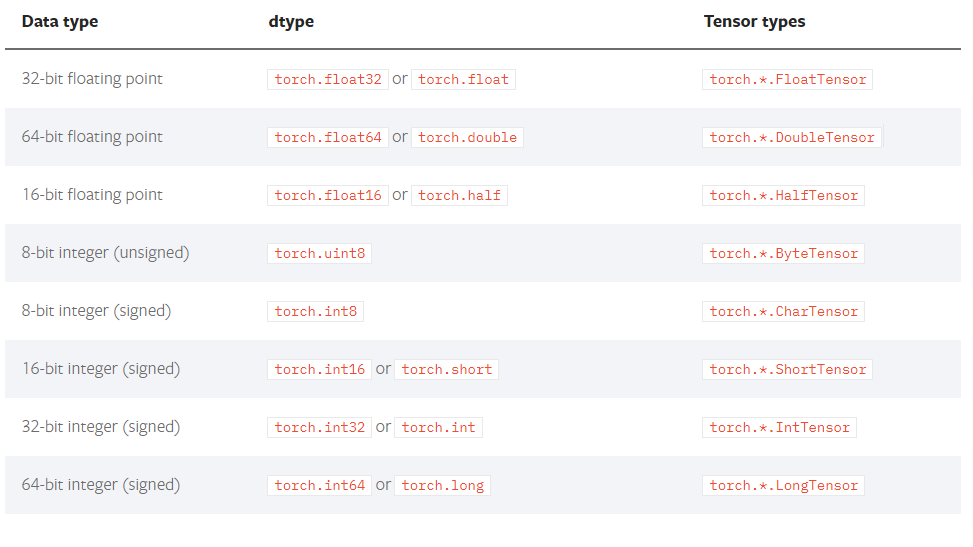
Le device sono "cpu" e "cuda:n" (una delle gpu)


In [5]:
device = torch.device('cuda', 0)
dtype = torch.float
t = torch.tensor([1,2,3], dtype=dtype, device=device)
print(f"device = {t.device}")
print(t.device==device)
print(f"numero della gpu: {t.get_device()}")
print(f"tipo: {t.dtype}")


device = torch.device('cpu')
dtype = torch.double
t = torch.tensor([1,2,3], dtype=dtype, device=device)
print(f"device = {t.device}")
print(t.device==device)
# get_device lancia un'eccezione se il tensore è sulla cpu
print(f"numero della cpu: {t.get_device()}")
print(f"tipo: {t.dtype}")

device = cuda:0
True
numero della gpu: 0
tipo: torch.float32
device = cpu
True


RuntimeError: get_device is not implemented for tensors with CPU backend

In [8]:
t1 = torch.tensor([1,2,3], dtype=torch.float, device=torch.device("cuda:0"))
t2 = torch.tensor([1,1,1], dtype=torch.float, device=torch.device("cuda:0"))
print(f"t1 + t2 = {t1+t2}")

t1 = torch.tensor([1,2,3], dtype=torch.float, device=torch.device("cpu"))
t2 = torch.tensor([1,1,1], dtype=torch.float, device=torch.device("cpu"))
print(f"t1 + t2 = {t1+t2}")

# gli operandi devono risiedere sulla stessa device, altrimenti l'operazione genera un'eccezione.
# Il tensore risultato risiede sulla stessa device degli operandi
t1 = torch.tensor([1,2,3], dtype=torch.float, device=torch.device("cuda:0"))
t2 = torch.tensor([1,1,1], dtype=torch.float, device=torch.device("cpu"))
print(f"t1 + t2 = {t1+t2}")

t1 + t2 = tensor([2., 3., 4.], device='cuda:0')
t1 + t2 = tensor([2., 3., 4.])


RuntimeError: expected type torch.cuda.FloatTensor but got torch.FloatTensor

In [6]:
type(torch.device('cuda', 0))

torch.device

In [7]:
type(torch.float)

torch.dtype